# Hoja de Trabajo 1
**Nombre:** Pablo Santizo\
**Carné:** 24000134\
**Curso** Ciencia de Datos en Python\
**Maestría:** Text Mining & Image Recognition\
**Universidad:** Galileo, Instituto en Investigación de Operaciones

## Librerias

In [106]:
#%pip install numpy opencv-python matplotlib

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Problema 1

Desarrolle una funcion la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color segun los siguientes
puntos:
- Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
- Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
- Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
- Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y verde.
- Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y azul.
- Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y rojo.

Función

In [113]:
def activar_canales_de_color(ruta_imagen, color):
    imagen = cv2.imread(ruta_imagen)
    if color == 1:
        imagen[:, :, 1] = 0
        imagen[:, :, 2] = 0
    elif color == 2:
        imagen[:, :, 0] = 0
        imagen[:, :, 2] = 0
    elif color == 3:
        imagen[:, :, 0] = 0
        imagen[:, :, 1] = 0
    elif color == 10:
        imagen[:, :, 0] = 0
    elif color == 20:
        imagen[:, :, 2] = 0
    elif color == 30:
        imagen[:, :, 1] = 0
    return imagen

Ejemplo de uso de la función

In [156]:
ruta_imagen='Ejercicio1/imagen_2.jpg'

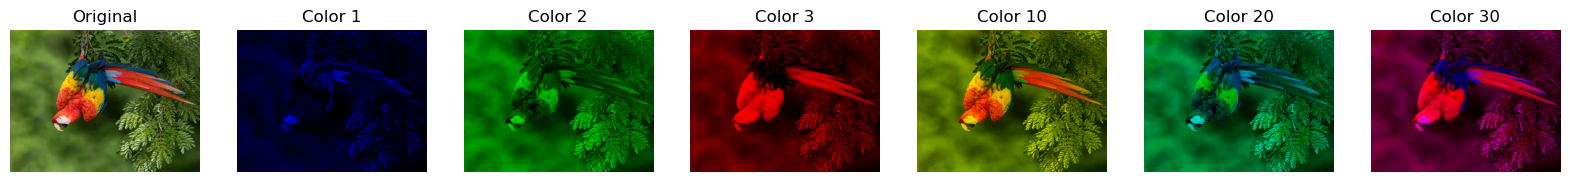

In [157]:
imagen_original = cv2.imread(ruta_imagen)
imagen_activada_1 = activar_canales_de_color(ruta_imagen, 1)
imagen_activada_2 = activar_canales_de_color(ruta_imagen, 2)
imagen_activada_3 = activar_canales_de_color(ruta_imagen, 3)
imagen_activada_10 = activar_canales_de_color(ruta_imagen, 10)
imagen_activada_20 = activar_canales_de_color(ruta_imagen, 20)
imagen_activada_30 = activar_canales_de_color(ruta_imagen, 30)

imagenes = [imagen_original, imagen_activada_1, imagen_activada_2, imagen_activada_3, imagen_activada_10, imagen_activada_20, imagen_activada_30]
titulos = ['Original', 'Color 1', 'Color 2', 'Color 3', 'Color 10', 'Color 20', 'Color 30']

fig, axs = plt.subplots(1, len(imagenes), figsize=(20, 10))
for i, ax in enumerate(axs):
    ax.imshow(cv2.cvtColor(imagenes[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titulos[i])
    ax.axis('off')
plt.show()

## Problema 2

En el .zip del laboratorio se le compartió un conjunto de imagenes en escala de grises (imagen1,
imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una
función que dadas las 3 imágenes se construya la imagen original a color.

Función

In [151]:
def combinar_imagenes_escala_grises(ruta_rojo, ruta_azul, ruta_verde):
    imagen_rojo = cv2.imread(ruta_rojo, cv2.IMREAD_GRAYSCALE)
    imagen_azul = cv2.imread(ruta_azul, cv2.IMREAD_GRAYSCALE)
    imagen_verde = cv2.imread(ruta_verde, cv2.IMREAD_GRAYSCALE)

    imagen_combinada = cv2.merge([imagen_azul, imagen_verde, imagen_rojo])
    return imagen_combinada

Uso de la función con las imagenes

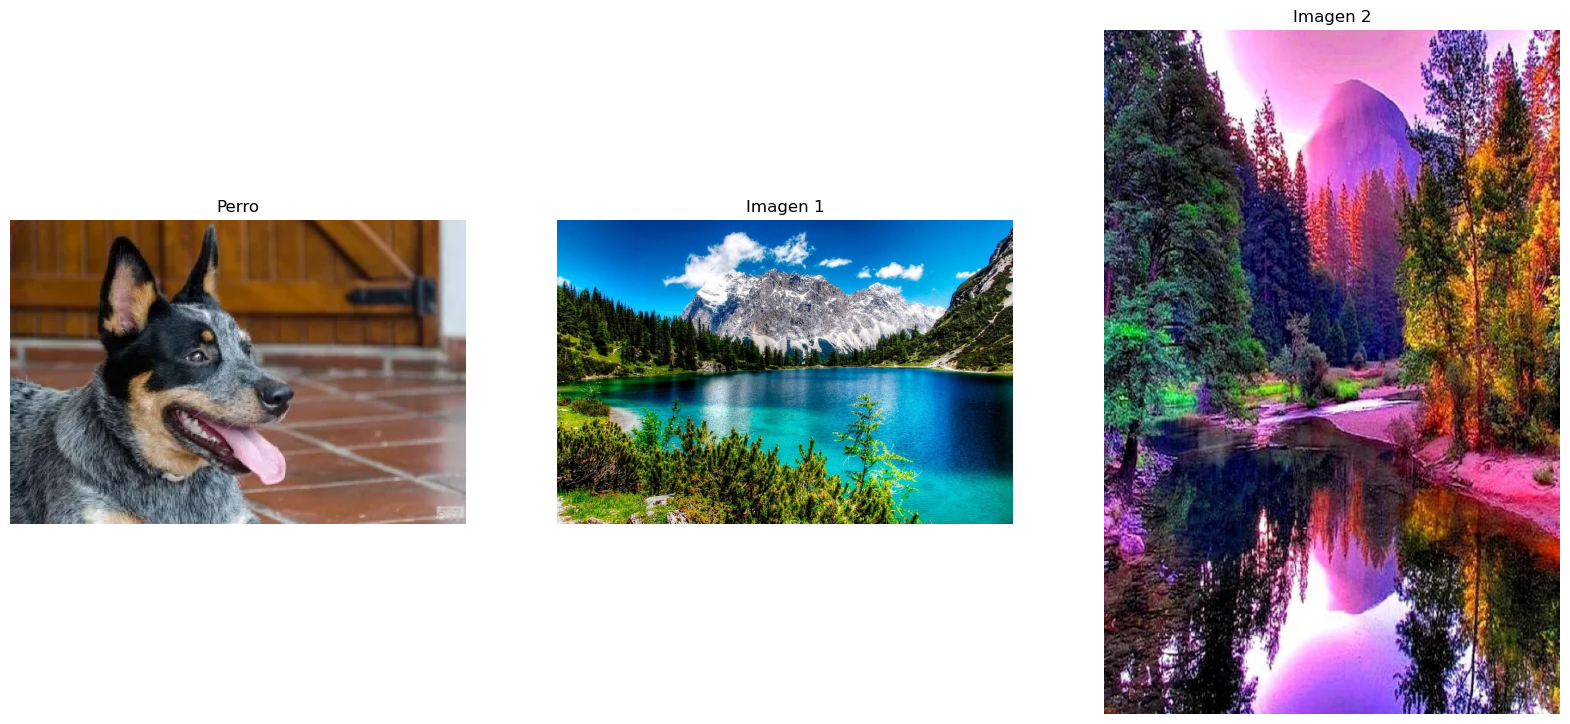

In [152]:
perro_imagen = combinar_imagenes_escala_grises('Lab1/perro/perro_salida_gray_rojo.jpg', 
                                               'Lab1/perro/perro_salida_gray_azul.jpg', 
                                               'Lab1/perro/perro_salida_gray_verde.jpg')
imagen_1 = combinar_imagenes_escala_grises('Lab1/imagen1/imagen1_salida_gray_rojo.jpg', 
                                           'Lab1/imagen1/imagen1_salida_gray_azul.jpg', 
                                           'Lab1/imagen1/imagen1_salida_gray_verde.jpg')
imagen_2 = combinar_imagenes_escala_grises('Lab1/imagen2/imagen2_salida_gray_rojo.jpg', 
                                           'Lab1/imagen2/imagen2_salida_gray_azul.jpg', 
                                           'Lab1/imagen2/imagen2_salida_gray_verde.jpg')

imagenes = [perro_imagen, imagen_1, imagen_2]
titulos = ['Perro', 'Imagen 1', 'Imagen 2']

fig, axs = plt.subplots(1, len(imagenes), figsize=(20, 10))
for i, ax in enumerate(axs):
    ax.imshow(cv2.cvtColor(imagenes[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titulos[i])
    ax.axis('off')
plt.show()

# Problema 3

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

Función

In [154]:
def canales_filtrados_en_grises(ruta_imagen):
    imagen_original = cv2.imread(ruta_imagen)
    imagen_original = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)
    
    canal_rojo = imagen_original[:, :, 0]
    canal_verde = imagen_original[:, :, 1]
    canal_azul = imagen_original[:, :, 2]
    
    gris_rojo = cv2.cvtColor(cv2.merge([canal_rojo, canal_rojo, canal_rojo]), cv2.COLOR_RGB2GRAY)
    gris_verde = cv2.cvtColor(cv2.merge([canal_verde, canal_verde, canal_verde]), cv2.COLOR_RGB2GRAY)
    gris_azul = cv2.cvtColor(cv2.merge([canal_azul, canal_azul, canal_azul]), cv2.COLOR_RGB2GRAY)

    cv2.imwrite('prueba_rojo.jpg', gris_rojo)
    cv2.imwrite('prueba_verde.jpg', gris_verde)
    cv2.imwrite('prueba_azul.jpg', gris_azul)
        
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(cv2.cvtColor(imagen_original, cv2.COLOR_RGB2GRAY), cmap='gray')
    axes[0].set_title("Original en Escala de Grises")
    axes[1].imshow(gris_rojo, cmap='gray')
    axes[1].set_title("Filtro Rojo en Escala de Grises")
    axes[2].imshow(gris_verde, cmap='gray')
    axes[2].set_title("Filtro Verde en Escala de Grises")
    axes[3].imshow(gris_azul, cmap='gray')
    axes[3].set_title("Filtro Azul en Escala de Grises")

    for ax in axes:
        ax.axis('off')

    plt.show()

    return gris_rojo, gris_verde, gris_azul

Ejemplo de uso de la función

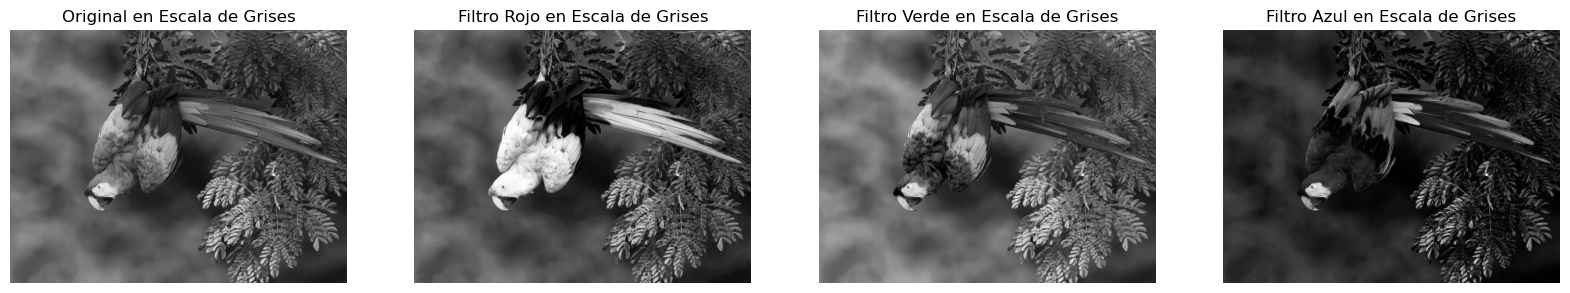

In [160]:
gris_rojo, gris_verde, gris_azul = canales_filtrados_en_grises(ruta_imagen)

Prueba con la función del problema dos

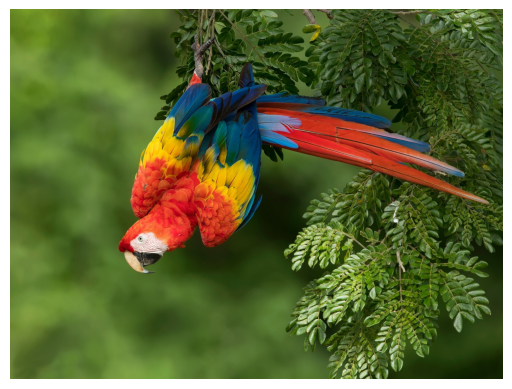

In [162]:
imagen_prueba = combinar_imagenes_escala_grises('prueba_rojo.jpg', 
                                               'prueba_azul.jpg', 
                                               'prueba_verde.jpg')

plt.imshow(cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Problema 4

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media
de la distribución.

Función

In [165]:
def mostrar_histograma(ruta_imagen):
    imagen = cv2.imread(ruta_imagen)
    colores = ('b', 'g', 'r')
    
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(colores):
        histograma = cv2.calcHist([imagen], [i], None, [256], [0, 256])
        plt.plot(histograma, color=col)
        plt.axvline(x=int(np.mean(imagen[:,:,i])), color=col, linestyle='dashed', linewidth=1)
    
    imagen_gris = np.mean(imagen, axis=2).astype(np.uint8)
    histograma_gris = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])
    plt.plot(histograma_gris, color='k')
    plt.axvline(x=int(np.mean(imagen_gris)), color='k', linestyle='dashed', linewidth=1)
    
    plt.title('Histogramas de canales de color y escala de grises')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Cantidad de píxeles')
    plt.show()


Ejemplo de uso con imágen de prueb

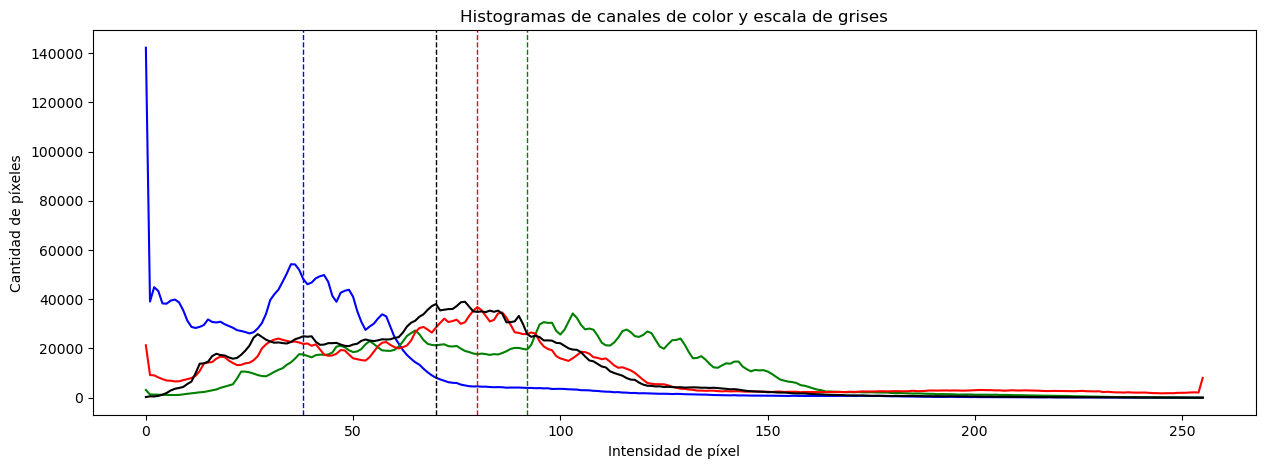

In [167]:
mostrar_histograma(ruta_imagen)

# Problema 5 

Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

Función

In [170]:
def escala_de_grises_ponderada_709(ruta_imagen):
    imagen = cv2.imread(ruta_imagen)
    gris_ponderada = 0.2126 * imagen[:, :, 2] + 0.7152 * imagen[:, :, 1] + 0.0722 * imagen[:, :, 0]
    gris_ponderada = gris_ponderada.astype(np.uint8)
    return gris_ponderada

Ejemplo de uso

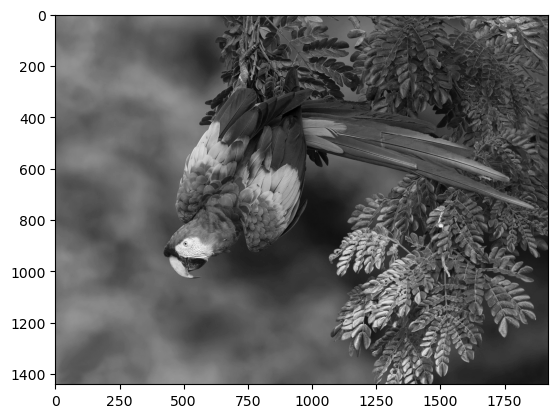

In [171]:
imagen_grises = escala_de_grises_ponderada_709(ruta_imagen)
plt.imshow(imagen_grises, cmap='gray')
plt.show()

# Problema 6

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajó los demás ejercicios.

### Espacio de Color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo que representa los colores en términos de sus componentes tonales, de saturación y de valor de brillo. Este modelo es ampliamente utilizado en aplicaciones gráficas y de procesamiento de imágenes debido a su capacidad para describir colores de una manera más intuitiva para los humanos en comparación con otros modelos de color como RGB (Red, Green, Blue).

### Componentes del Espacio de Color HSV

1. **Hue (Tono)**: Representa el ángulo en el círculo cromático, que va de 0 a 360 grados. Cada valor de ángulo corresponde a un color específico:
   - 0°: Rojo
   - 60°: Amarillo
   - 120°: Verde
   - 180°: Cian
   - 240°: Azul
   - 300°: Magenta

2. **Saturation (Saturación)**: Indica la pureza del color, es decir, cuánta cantidad de gris se mezcla con el color. Se expresa como un porcentaje que va del 0% (gris puro) al 100% (color puro).

3. **Value (Valor o Brillo)**: Representa la luminosidad del color, variando del 0% (negro) al 100% (brillo máximo).

### Mapeo de Colores al Espacio HSV

Para mapear colores desde el espacio RGB al espacio HSV, se utilizan una serie de transformaciones matemáticas que convierten los valores de rojo, verde y azul en valores de tono, saturación y valor. El proceso general es el siguiente:

1. **Normalización**: Los valores RGB, que normalmente están en el rango de 0 a 255, se normalizan al rango de 0 a 1.
2. **Cálculo del Valor (V)**: El valor (V) se obtiene como el máximo de los valores normalizados R, G y B.
3. **Cálculo de la Saturación (S)**: Si el valor máximo (V) es 0, la saturación (S) se define como 0. Si no, la saturación se calcula como:
   \[
   S = \frac{V - \text{min}(R, G, B)}{V}
   \]
4. **Cálculo del Tono (H)**: Si los valores R, G y B son todos iguales, el tono (H) se define como 0. Si no, se calcula basado en el valor máximo (V) y las diferencias entre los valores de los colores, usando fórmulas específicas dependiendo de cuál de los tres valores (R, G o B) es el mayor.

### Aplicaciones del Espacio HSV

El espacio de color HSV es especialmente útil en aplicaciones donde se necesita ajustar el color de manera intuitiva, como en herramientas de edición de imágenes, gráficos por computadora y sistemas de visión por computadora. Permite manipular los colores en términos de sus componentes perceptuales, lo que facilita tareas como el ajuste de tonos, la modificación de la saturación y el control del brillo.

### Referencias Bibliográficas

1. **Gonzalez, R. C., & Woods, R. E. (2002). Digital Image Processing (2nd ed.). Prentice Hall.**
   - Este libro ofrece una amplia explicación sobre los distintos modelos de color, incluyendo el modelo HSV, y proporciona detalles sobre las transformaciones entre espacios de color.

2. **Smith, A. R. (1978). Color gamut transform pairs. ACM SIGGRAPH Computer Graphics, 12(3), 12-19.**
   - Este artículo seminal describe la creación y la aplicación de diferentes espacios de color, incluyendo HSV, y explora su utilidad en gráficos por computadora.

3. **Foley, J. D., van Dam, A., Feiner, S. K., & Hughes, J. F. (1996). Computer Graphics: Principles and Practice (2nd ed.). Addison-Wesley.**
   - Un recurso fundamental para comprender los principios subyacentes en gráficos por computadora, incluyendo una sección dedicada a los modelos de color y sus aplicaciones.

4. **Fairchild, M. D. (2013). Color Appearance Models (3rd ed.). Wiley-IS&T Series in Imaging Science and Technology.**
   - Este libro proporciona una comprensión profunda de cómo se perciben y modelan los colores, con una sección específica sobre el modelo HSV y sus aplicaciones en la tecnología de imágenes.


# Subir a GITHUB

In [177]:
cd "Desktop/Maestría de data science/Text mining/Hoja de trabajo 1"

[WinError 3] The system cannot find the path specified: 'Desktop/Maestría de data science/Text mining/Hoja de trabajo 1'
C:\Users\joshp\Desktop\Maestría de data science\Text mining\Hoja de trabajo 1
